## Answers to Assignment 3 of 230A

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q1

From the pricing results derived in class
$$
 P_0 = E_t \left[ \sum_{n=0}^\infty M_{0,n\Delta t} \cdot Y_{n\Delta t} \right] = Y_0 E_t \left[ \sum_{n=0}^\infty e^{-n\rho\Delta t-\gamma v_{n\Delta t}} \left( e^{v_{n\Delta t}} \right)^{1-r} \Delta t \right] $$
$$v_t ~N(\mu t,\sigma^2t) $$
 $$E_t \left[ e^{-(1-2\gamma)v_t} \right] = e^{(1-2\gamma)\mu t+\frac{(1-2\gamma)^2\sigma^2t}{2}}$$
$$ {P_0} =  {Y_0}\int_{0}^{\infty}e^{(1-2\gamma)\mu t+\frac{(1-2\gamma)^2\sigma^2t}{2}-\rho t}dt$$
$$=\frac{1}{\rho-(1-2\gamma)\mu-\frac{(1-2\gamma)^2\sigma^2}{2}} $$

For the second part of this question, as we have $\frac{Y_T}{p_T} = r$ (a constant in this economy), we have $p_T = \frac{Y_T}{r}$, and $r = \frac{Y_0}{p_0} = \rho-(1-2\gamma)\mu-\frac{(1-2\gamma)^2\sigma^2}{2}$


Hence, it follows that 
$$G_0=E_{T}[M_{0,T}p_{T}]=E_{T}[M_{0,T}\frac{Y_{T}}{r}]=E_{T}[e^{-\rho T - \gamma v_T}e^{v_T}]= E_{T}[e^{-\rho T - (\gamma -1) v_T}]*\frac{1}{r}$$

As, $-\rho T - (\gamma -1) v_T \sim N(-\rho T - (\gamma-1)\mu T,(\gamma - 1)^2 \sigma^2 T)$ 

Hence the above expectation follows from value of exponentiation of a normal random variable


$$G_0=\frac{e^{-\rho T-(\gamma-1)\mu T+\frac{(\gamma-1)^2\sigma^2T}{2}}}{\rho-(1-2\gamma)\mu-\frac{(1-2\gamma)^2\sigma^2}{2}}$$




### Q2

#### (a)
$$
 \text{Cov}_t(M_{t,t+1}R_t, R_t) = E(M_{t,t+1}R_t^2) - E(M_{t,t+1}R_t) E(R_t) $$


$$
 \text{Notice} \quad E^Q[R] = R_f $$


$$
 \frac{Var^Q_t(R_t)}{R_f} = \frac{E^Q[R_t^2] - (E^Q[R_t])^2}{R_f} = \frac{E^Q[R_t^2]}{R_f} - R_f $$


$$
 \frac{Var^Q_t(R_t)}{R_f} - \text{Cov}_t(M_{t,t+1}R_{t+1}, R_t) = \frac{E^Q[R_t^2]}{R_f} - R_f - \left( \frac{E^Q[R_t^2]}{R_f} + E(R_t) \right) $$


$$
 \frac{Var^Q_t(R_t)}{R_f} - \text{Cov}_t(M_{t,t+1}R_{t+1}, R_t) = E(R_t) - R_f $$

#### (b)

Lemma. Let $
 (X_1, Y_1), (X_2, Y_2) $
 be independent version of $
 (X,Y) $
.

Proof:
$$
 E((X_2 - X_1)(Y_2 - Y_1)) = E(X_2Y_2) - E(X_2)E(Y_2) - E(X_1)E(Y_1) + E(X_1Y_1) = 2E(XY) - 2E(X)E(Y) $$


$$
 = 2E(XY) - 2E(X)E(Y) = 2(E(XY) - E(X)E(Y)) $$


Take $
 X = R_t^{m} $
, $
 Y = R_t^{m(1-\gamma)} $
, for every realization of $
 Z = (Y_2 - Y_1)(X_2 - X_1) $
,

if $ X_1 \geq X_2 $, since $ 1-\gamma \leq 0 $,we have $ Y_1 \leq Y_2 $,so $Z \leq 0 $.
Therefore $ E(Z) \leq 0$,$ Cov(R_t^m, R_t^{m(1-\gamma)}) \leq 0 $ 

Further, as $M_{t,t+1}=a*(R_t^{m})^{-\gamma}$, it follows that
$$Cov(M_{t,t+1}R_t^{m}, R_t^m) \leq 0 $$


Hence, as $Cov(M_{t,t+1}R_t^{m}, R_t^m) \leq 0 $, we conclude from the results in question that 

$E_{t}(R_t^{m})-R_{f}\geq \frac{SVIX_{t}}{R_{f}}$

### Q3

#### Data Prep

In [2]:
data = pd.read_csv('Factors.csv')
data.set_index('Unnamed: 0', inplace=True)

for i in ['Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market']:
    data[f'{i} Ex'] = data[i] - data['Rf']

data['Rf Ex'] = data['Rf'] # for generalization when we indec by Ex

sub1 = data.loc[1926_07:1963_12,:]
sub2 = data.loc[1964_01:2024_02,:]

In [3]:
def min_var(cov):
    #cov is inv-cov
    l = len(cov)
    return (cov @ np.ones(l))/(np.ones(l) @ data_cov_inv @ np.ones(l))

def mean_var(cov, mean):
    #cov is inv-cov
    l = len(cov)
    return (cov @ mean)/(np.ones(l) @ cov @ mean)

def mean_var_rf(cov, mean, rf):
    #returns weight on rf asset
    A = min_var(cov)
    B = mean_var(cov, mean)
    l = len(cov)
    return (1 / (B - A * rf)) @ cov @ (mean - rf * np.ones(l))

def port_mean(weights, means):
    return weights @ means

def port_var(weights, cov):
    #cov is inv-cov
    return weights @ cov @ weights


# def port_beta(weights, cov, off=0):
#     # last entry is market 
#     D = np.linalg.inv(np.diag(np.sqrt(np.diag(data_cov))))
#     corr = D @ data_cov @ D
#     return np.sum(weights * corr[-1-off])

def port_beta(weights, cov):
    betas = cov[4]/cov[4][4]
    return np.sum(weights * betas)

In [4]:
def plot(data_mean_var, data_min_var, data_cov, data_means, portfolios):

    front = []
    for i in np.linspace(-0.5, 1.5, 500): # frontier
        weights_new = i*data_mean_var + (1-i)*data_min_var
        front.append((port_mean(weights_new, data_means), np.sqrt(port_var(weights_new, data_cov))))
    
    front = np.array(front).T
    
    fig, ax = plt.subplots()
    #mean var
    ax.scatter(np.sqrt(port_var(data_mean_var, data_cov)), 
               port_mean(data_mean_var, data_means))
    ax.annotate('Mean-Var',
               (np.sqrt(port_var(data_mean_var, data_cov)), 
               port_mean(data_mean_var, data_means)))
    #min var
    ax.scatter(np.sqrt(port_var(data_min_var, data_cov)), 
               port_mean(data_min_var, data_means))
    ax.annotate('Min-Var',
               (np.sqrt(port_var(data_min_var, data_cov)), 
               port_mean(data_min_var, data_means)))
    
    for i in range(0,len(portfolios)):
        ax.scatter(np.sqrt(data_cov[i][i]), data_means[i])
        ax.annotate(portfolios[i], (np.sqrt(data_cov[i][i]), data_means[i]))
    
    #frontier
    ax.plot(front[1], front[0])

    ax.set_ylabel('Mean Excess Return')
    ax.set_xlabel('Standard Deviation of Excess Return')
    
    ax.grid(color='white')
    ax.set_facecolor((0.90,0.90,0.95))
    fig.show()

    
    print('Mean-Var Sharpe:', port_mean(data_mean_var, data_means)/np.sqrt(port_var(data_mean_var, data_cov)))
    print('Market Sharpe:', data_means[4]/np.sqrt(data_cov[4][4]))

In [5]:
def plot_betas(data_mean_var, data_min_var, data_cov, data_means, portfolios, rf, w=None):
    off = 0
    if w is not None:
        data_mean_var = data_mean_var*(1-w) 
        data_mean_var = np.append(data_mean_var, w)
        data_min_var = np.append(data_min_var, 0)
        off = 1
    
    fig, ax = plt.subplots()
    #mean var
    ax.scatter(port_beta(data_mean_var, data_cov), 
               port_mean(data_mean_var, data_means))
    ax.annotate('Mean-Var',
               (port_beta(data_mean_var, data_cov), 
               port_mean(data_mean_var, data_means)))
    #min var
    ax.scatter(port_beta(data_min_var, data_cov), 
               port_mean(data_min_var, data_means))
    ax.annotate('Min-Var',
               (port_beta(data_min_var, data_cov), 
               port_mean(data_min_var, data_means)))

    # D = np.linalg.inv(np.diag(np.sqrt(np.diag(data_cov))))
    # corr = (D @ data_cov @ D)[-1-off]
    
    for i in range(0,len(portfolios)):
        beta = data_cov[i][4] / data_cov[4][4]
        ax.scatter(beta, data_means[i])
        ax.annotate(portfolios[i], (beta, data_means[i]))
    
    
    ax.grid(color='white')
    ax.set_facecolor((0.90,0.90,0.95))

    ax.set_ylabel('Mean')
    ax.set_xlabel('Beta')
    fig.show()

#### (a) 
#### Mean-Var and Min-Var Portfolios (No RF)

In [6]:
portfolios = ['Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market']

In [7]:
data_cov = np.cov(data[[f'{i} Ex' for i in portfolios]].T)
data_means = [data[f'{i} Ex'].mean() for i in portfolios]

sub1_cov = np.cov(sub1[[f'{i} Ex' for i in portfolios]].T)
sub1_means = [sub1[f'{i} Ex'].mean() for i in portfolios]

sub2_cov = np.cov(sub2[[f'{i} Ex' for i in portfolios]].T)
sub2_means = [sub2[f'{i} Ex'].mean() for i in portfolios]

##### Excess Return and Covariance of Excess Return

In [8]:
print("Portfolio Order - For Reference over Cov and Mean")
print(portfolios)
print()
print("Total Sample")
print("Cov")
print(data_cov)
print("Mean")
print(data_means)
print()
print("Sub Sample 1")
print("Cov")
print(sub1_cov)
print("Mean")
print(sub1_means)
print()
print("Sub Sample 2")
print("Cov")
print(sub2_cov)
print("Mean")
print(sub2_means)
print()


Portfolio Order - For Reference over Cov and Mean
['Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market']

Total Sample
Cov
[[56.00322622 54.04270248 33.79431128 43.12079337 35.57584022]
 [54.04270248 65.8914104  33.61074396 53.13058654 37.51227782]
 [33.79431128 33.61074396 28.1622775  31.1783589  27.71428689]
 [43.12079337 53.13058654 31.1783589  50.9306339  34.44523584]
 [35.57584022 37.51227782 27.71428689 34.44523584 28.5323145 ]]
Mean
[0.711357337883959, 1.1547472696245735, 0.6785650170648465, 0.9199558020477816, 0.6818515358361775]

Sub Sample 1
Cov
[[ 70.11693363  84.56864594  45.6846457   71.56090788  49.32027767]
 [ 84.56864594 117.38168892  55.8694223   97.23071614  62.56379343]
 [ 45.6846457   55.8694223   38.44227438  51.93112666  39.44440755]
 [ 71.56090788  97.23071614  51.93112666  90.80336447  57.75961924]
 [ 49.32027767  62.56379343  39.44440755  57.75961924  41.73022439]]
Mean
[0.9431386666666666, 1.4320402222222224, 0.8362293333333334, 1.226887111111111, 0.8612

##### Total Sample

In [9]:
data_cov

array([[56.00322622, 54.04270248, 33.79431128, 43.12079337, 35.57584022],
       [54.04270248, 65.8914104 , 33.61074396, 53.13058654, 37.51227782],
       [33.79431128, 33.61074396, 28.1622775 , 31.1783589 , 27.71428689],
       [43.12079337, 53.13058654, 31.1783589 , 50.9306339 , 34.44523584],
       [35.57584022, 37.51227782, 27.71428689, 34.44523584, 28.5323145 ]])

In [10]:
data_cov_inv = np.linalg.inv(data_cov)
data_min_var = min_var(data_cov_inv)
data_mean_var = mean_var(data_cov_inv, data_means)

sub1_cov_inv = np.linalg.inv(sub1_cov)
sub1_min_var = min_var(sub1_cov_inv)
sub1_mean_var = mean_var(sub1_cov_inv, sub1_means)

sub2_cov_inv = np.linalg.inv(sub2_cov)
sub2_min_var = min_var(sub2_cov_inv)
sub2_mean_var = mean_var(sub2_cov_inv, sub2_means)

Mean-Var Sharpe: 0.1897518299376693
Market Sharpe: 0.12765014775436295


/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/3901145969.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


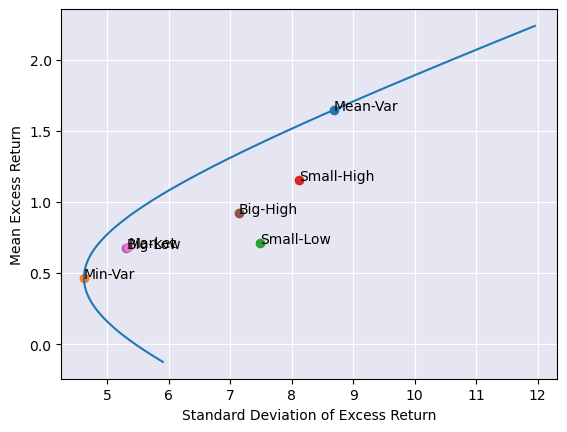

In [11]:
plot(data_mean_var, data_min_var, data_cov, data_means, portfolios)

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1597628353.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


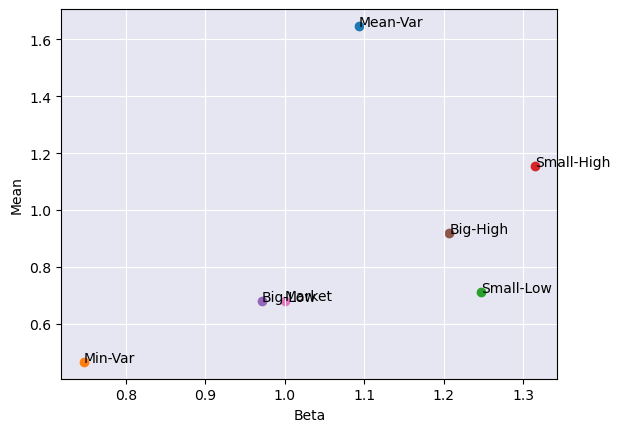

In [12]:
plot_betas(data_mean_var, data_min_var, data_cov, data_means, portfolios, data['Rf'].mean())

In [13]:
# Some alpha printing
rf = data['Rf'].mean()
for j, i in enumerate(portfolios):
    beta = data_cov[j][4] / data_cov[4][4]
    print(f'{i} Alpha:', data[i].mean() - rf - (beta * data_means[4]))

Small-Low Alpha: -0.1388169896504211
Small-High Alpha: 0.25829688739405343
Big-Low Alpha: 0.016262311847456745
Big-High Alpha: 0.09680011465642169
Market Alpha: 0.0


##### Sub Sample 1 - pre 1964/01

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/3901145969.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Mean-Var Sharpe: 0.16005731457776937
Market Sharpe: 0.13331489076076555


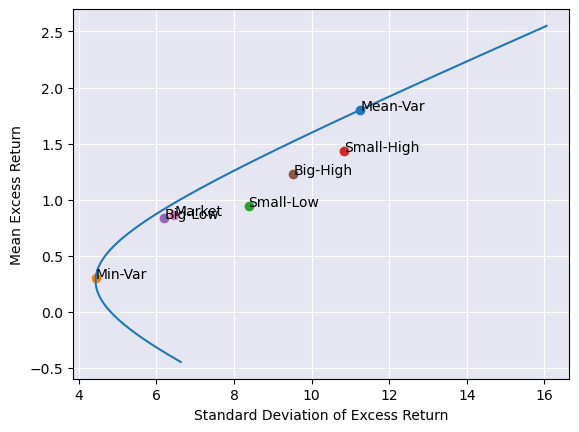

In [14]:
plot(sub1_mean_var, sub1_min_var, sub1_cov, sub1_means, portfolios)

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1597628353.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


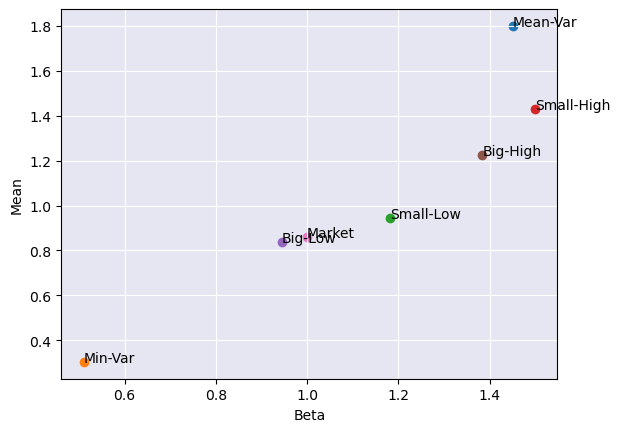

In [15]:
plot_betas(sub1_mean_var, sub1_min_var, sub1_cov, sub1_means, portfolios, sub1['Rf'].mean())

In [16]:
# Some alpha printing
rf = sub1['Rf'].mean()
for j, i in enumerate(portfolios):
    beta = sub1_cov[j][4] / sub1_cov[4][4]
    print(f'{i} Alpha:', sub1[i].mean() - rf - (beta * sub1_means[4]))

Small-Low Alpha: -0.07469969257985054
Small-High Alpha: 0.14089118836974435
Big-Low Alpha: 0.022202467165184703
Big-High Alpha: 0.034883358038866996
Market Alpha: -3.3306690738754696e-16


##### Sub Sample 2 - post 1964/01

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/3901145969.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Mean-Var Sharpe: 0.26563070546664114
Market Sharpe: 0.12646257221023682


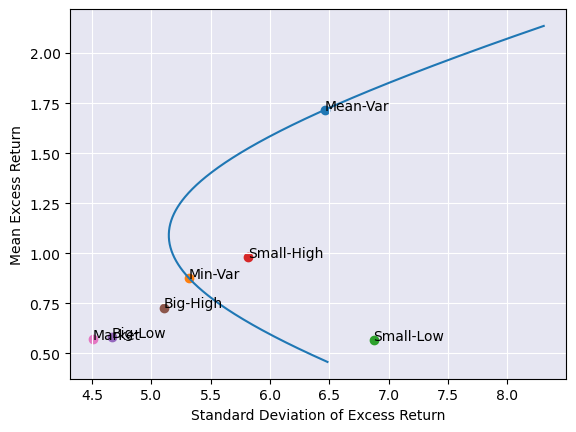

In [17]:
plot(sub2_mean_var, sub2_min_var, sub2_cov, sub2_means, portfolios)

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1597628353.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


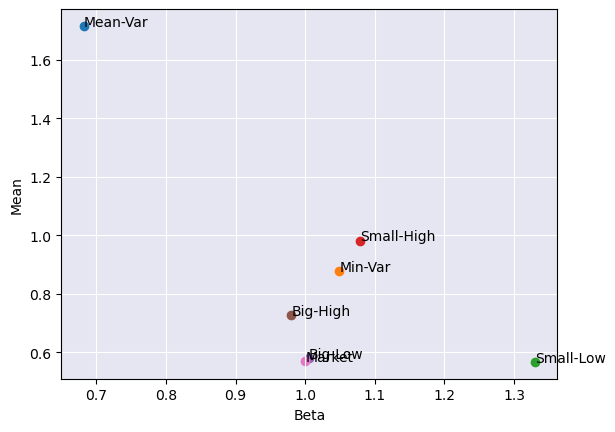

In [18]:
plot_betas(sub2_mean_var, sub2_min_var, sub2_cov, sub2_means, portfolios, sub2['Rf'].mean())

In [19]:
# Some alpha printing
rf = sub2['Rf'].mean()
for j, i in enumerate(portfolios):
    beta = sub2_cov[j][4] / sub2_cov[4][4]
    print(f'{i} Alpha:', sub2[i].mean() - rf - (beta * sub2_means[4]))

Small-Low Alpha: -0.19123239279780013
Small-High Alpha: 0.367164483371066
Big-Low Alpha: 0.007455718614618245
Big-High Alpha: 0.1698651744195092
Market Alpha: 0.0


#### Mean-Var and Min-Var Portfolios (RF)

In [20]:
portfolios = ['Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market']

In [21]:
data_cov = np.cov(data[[f'{i} Ex' for i in portfolios]].T)
data_means = [data[f'{i} Ex'].mean() for i in portfolios]

sub1_cov = np.cov(sub1[[f'{i} Ex' for i in portfolios]].T)
sub1_means = [sub1[f'{i} Ex'].mean() for i in portfolios]

sub2_cov = np.cov(sub2[[f'{i} Ex' for i in portfolios]].T)
sub2_means = [sub2[f'{i} Ex'].mean() for i in portfolios]

In [22]:
data_cov_inv = np.linalg.inv(data_cov)
data_min_var = min_var(data_cov_inv)
data_mean_var = mean_var(data_cov_inv, data_means)
data_w = mean_var_rf(data_cov_inv, data_means, data['Rf'].mean())

sub1_cov_inv = np.linalg.inv(sub1_cov)
sub1_min_var = min_var(sub1_cov_inv)
sub1_mean_var = mean_var(sub1_cov_inv, sub1_means)
sub1_w = mean_var_rf(sub1_cov_inv, sub1_means, sub1['Rf'].mean())

sub2_cov_inv = np.linalg.inv(sub2_cov)
sub2_min_var = min_var(sub2_cov_inv)
sub2_mean_var = mean_var(sub2_cov_inv, sub2_means)
sub2_w = mean_var_rf(sub2_cov_inv, sub2_means, sub2['Rf'].mean())

In [23]:
data_cov = np.cov(data[[f'{i} Ex' for i in portfolios + ['Rf']]].T)
data_means = [data[f'{i} Ex'].mean() for i in portfolios + ['Rf']]

sub1_cov = np.cov(sub1[[f'{i} Ex' for i in portfolios + ['Rf']]].T)
sub1_means = [sub1[f'{i} Ex'].mean() for i in portfolios + ['Rf']]

sub2_cov = np.cov(sub2[[f'{i} Ex' for i in portfolios + ['Rf']]].T)
sub2_means = [sub2[f'{i} Ex'].mean() for i in portfolios + ['Rf']]

In [24]:
def plot_rf(data_mean_var, data_min_var, data_cov, data_means, portfolios, w, rf):

    data_mean_var = data_mean_var*(1-w) 
    data_mean_var = np.append(data_mean_var, w)
    data_min_var = np.append(data_min_var, 0)
    
    front = []
    for i in np.linspace(-0.5, 1.5, 500): # frontier
        weights_new = i*data_mean_var + (1-i)*data_min_var
        front.append((port_mean(weights_new, data_means), np.sqrt(port_var(weights_new, data_cov))))
    
    front = np.array(front).T
    
    fig, ax = plt.subplots()
    #mean var
    ax.scatter(np.sqrt(port_var(data_mean_var, data_cov)), 
               port_mean(data_mean_var, data_means))
    ax.annotate('Mean-Var',
               (np.sqrt(port_var(data_mean_var, data_cov)), 
               port_mean(data_mean_var, data_means)))
    #min var
    ax.scatter(np.sqrt(port_var(data_min_var, data_cov)), 
               port_mean(data_min_var, data_means))
    ax.annotate('Min-Var',
               (np.sqrt(port_var(data_min_var, data_cov)), 
               port_mean(data_min_var, data_means)))
    
    for i in range(0,len(portfolios)):
        ax.scatter(np.sqrt(data_cov[i][i]), data_means[i])
        ax.annotate(portfolios[i], (np.sqrt(data_cov[i][i]), data_means[i]))
    
    #frontier
    ax.plot(front[1], front[0])

    ax.set_ylabel('Mean Excess Return')
    ax.set_xlabel('Standard Deviation of Excess Return')
    ax.grid(color='white')
    ax.set_facecolor((0.90,0.90,0.95))
    fig.show()

    print('Mean-Var Sharpe:', port_mean(data_mean_var, data_means)/np.sqrt(port_var(data_mean_var, data_cov)))
    print('Market Sharpe:', data_means[4]/np.sqrt(data_cov[4][4]))

##### Total Sample

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/873273535.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Mean-Var Sharpe: 0.19332978290829222
Market Sharpe: 0.12765014775436295


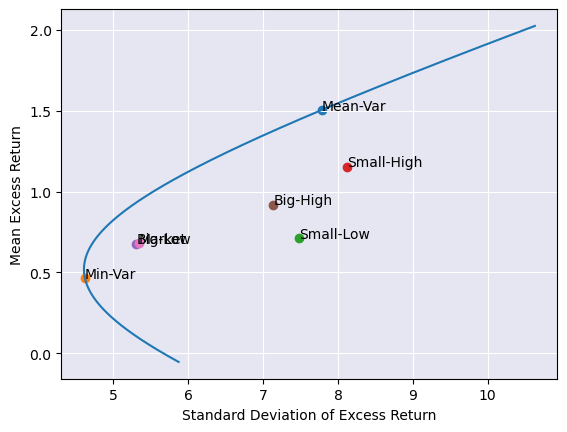

In [25]:
plot_rf(data_mean_var, data_min_var, data_cov, data_means, portfolios, data_w, data['Rf'].mean())

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1597628353.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


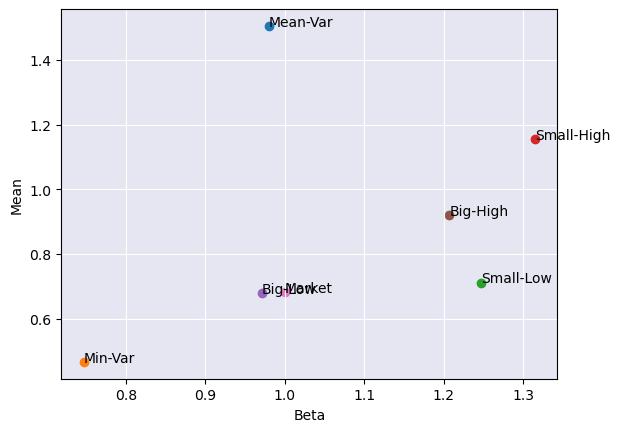

In [26]:
plot_betas(data_mean_var, data_min_var, data_cov, data_means, portfolios, data['Rf'].mean(), data_w)

In [27]:
# Some alpha printing
rf = data['Rf'].mean()
for j, i in enumerate(portfolios):
    beta = data_cov[j][4] / data_cov[4][4]
    print(f'{i} Alpha:', data[i].mean() - rf - (beta * data_means[4]))

Small-Low Alpha: -0.13881698965042077
Small-High Alpha: 0.2582968873940531
Big-Low Alpha: 0.016262311847456634
Big-High Alpha: 0.09680011465642158
Market Alpha: 0.0


##### Sub Sample 1 - pre 1964/01

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/873273535.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Mean-Var Sharpe: 0.16096360934465556
Market Sharpe: 0.13331489076076555


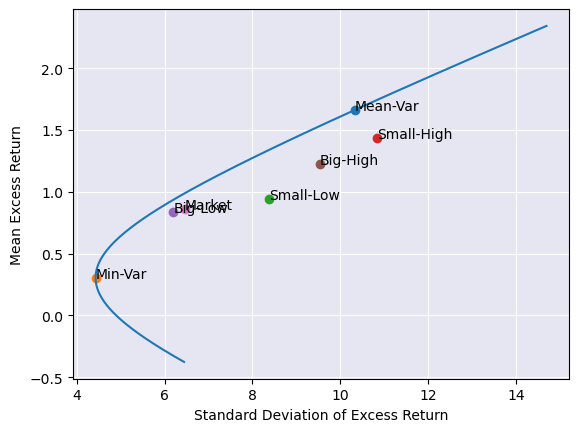

In [28]:
plot_rf(sub1_mean_var, sub1_min_var, sub1_cov, sub1_means, portfolios, sub1_w, sub1['Rf'].mean())

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1597628353.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


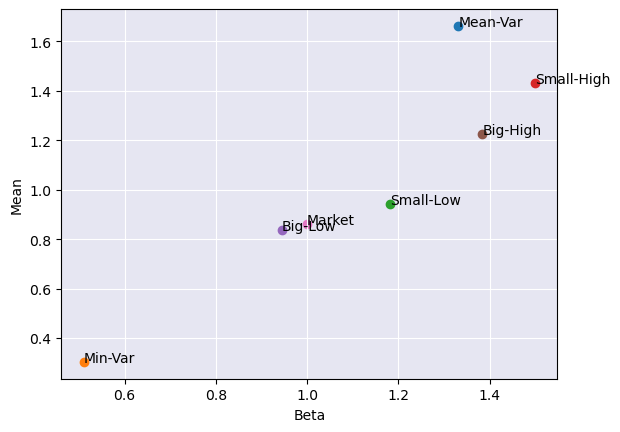

In [29]:
plot_betas(sub1_mean_var, sub1_min_var, sub1_cov, sub1_means, portfolios, sub1['Rf'].mean(), sub1_w)

In [30]:
# Some alpha printing
rf = sub1['Rf'].mean()
for j, i in enumerate(portfolios):
    beta = sub1_cov[j][4] / sub1_cov[4][4]
    print(f'{i} Alpha:', sub1[i].mean() - rf - (beta * sub1_means[4]))

Small-Low Alpha: -0.07469969257985032
Small-High Alpha: 0.14089118836974457
Big-Low Alpha: 0.022202467165185036
Big-High Alpha: 0.03488335803886744
Market Alpha: -3.3306690738754696e-16


##### Sub Sample 2 - post 1964/01

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/873273535.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Mean-Var Sharpe: 0.2799654622155891
Market Sharpe: 0.12646257221023682


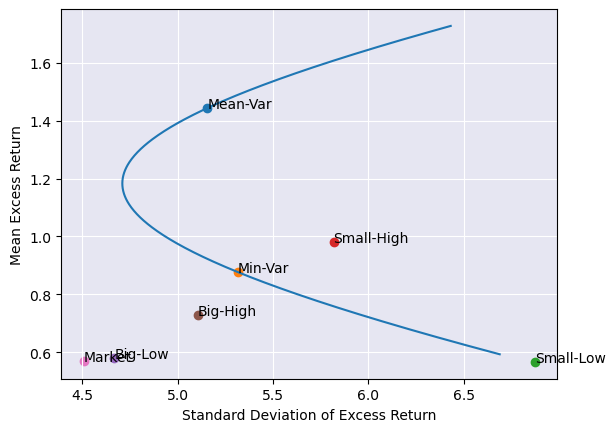

In [31]:
plot_rf(sub2_mean_var, sub2_min_var, sub2_cov, sub2_means, portfolios, sub2_w, sub2['Rf'].mean)

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1597628353.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


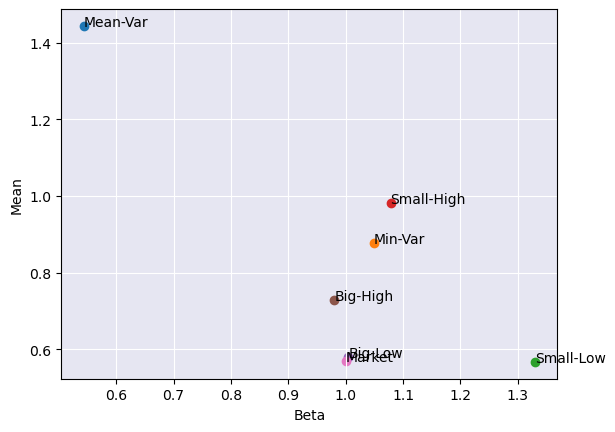

In [32]:
plot_betas(sub2_mean_var, sub2_min_var, sub2_cov, sub2_means, portfolios, sub2['Rf'].mean(), sub2_w)

In [33]:
# Some alpha printing
rf = sub2['Rf'].mean()
for j, i in enumerate(portfolios):
    beta = sub2_cov[j][4] / sub2_cov[4][4]
    print(f'{i} Alpha:', sub2[i].mean() - rf - (beta * sub2_means[4]))

Small-Low Alpha: -0.19123239279780002
Small-High Alpha: 0.367164483371066
Big-Low Alpha: 0.007455718614618134
Big-High Alpha: 0.1698651744195091
Market Alpha: 0.0


#### Part A Discussion

We could observe that market excess return this fundamental factor could not determine the expected return completely. We could see that Small-Low, Small-High, Big-High and Big-Low portfolios have non zero alphas and the alphas vary from time to time. <br><br>Pre 1964 the betas in the market were quite variable, yet the alphas were small. Almost paradoxically, we see that post 1964 our betas shrink, all portfolios move more in sync with the market, yet alpha emerges. Most notably it was the betas of the small cap stocks that shifted to 1 the most.

#### (b)

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1207171088.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


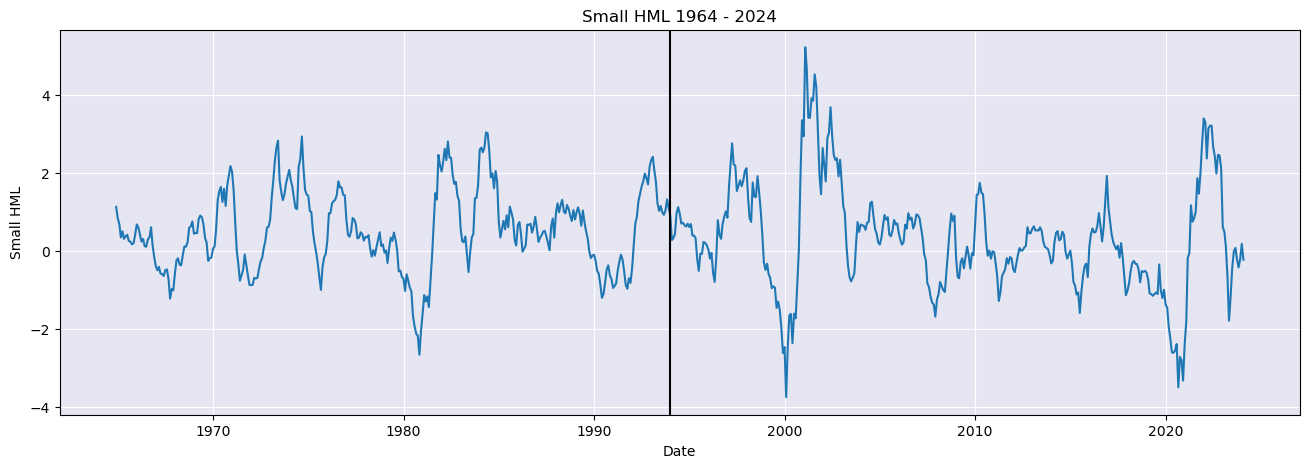

In [34]:
fig, ax = plt.subplots(figsize=(16,5))
ax.grid(color='white')
ax.set_facecolor((0.90,0.90,0.95))
ax.plot(pd.to_datetime(sub2.index, format='%Y%m'), 
        (sub2['Small-High'] - sub2['Small-Low']).rolling(12).mean())

ax.axvline(pd.to_datetime('1994-01-01'), c='black')

ax.set_ylabel('Small HML')
ax.set_xlabel('Date')
ax.set_title('Small HML 1964 - 2024')

fig.show()

In [35]:
print("Mean & Std. & Sharpe Ratio for Market Portfolio \n")

split = 199312
ret_period1=sub2.loc[:split,"Market"] - sub2.loc[:split,"Rf"]
ret_period2=sub2.loc[split:,"Market"] - sub2.loc[split:,"Rf"]

print("1964/01-1993/12")
print(f"mean={ret_period1.mean()}, std={ret_period1.std()}, sharpe ratio={ret_period1.mean()/ret_period1.std()}\n")

print("1994/01-2024/02")
print(f"mean={ret_period2.mean()}, std={ret_period2.std()}, sharpe ratio={ret_period2.mean()/ret_period2.std()}\n")

print("Mean & Std. & Sharpe Ratio for Small HML")

hml_period1=sub2.loc[:split,"Small-High"] - sub2.loc[:split,"Small-Low"]
hml_period2=sub2.loc[split:,"Small-High"] - sub2.loc[split:,"Small-Low"]

print("1964/01-1993/12")
print(f"mean={hml_period1.mean()}, std={hml_period1.std()}, sharpe ratio={hml_period1.mean()/hml_period1.std()}\n")

print("1994/01-2024/02")
print(f"mean={hml_period2.mean()}, std={hml_period2.std()}, sharpe ratio={hml_period2.mean()/hml_period2.std()}\n")


Mean & Std. & Sharpe Ratio for Market Portfolio 

1964/01-1993/12
mean=0.40874999999999995, std=4.495393909294429, sharpe ratio=0.09092640339145608

1994/01-2024/02
mean=0.7330303030303028, std=4.514634174672781, sharpe ratio=0.16236759716714644

Mean & Std. & Sharpe Ratio for Small HML
1964/01-1993/12
mean=0.5342047222222222, std=2.8326643514198673, sharpe ratio=0.18858737073965473

1994/01-2024/02
mean=0.2952424242424242, std=3.729180892756798, sharpe ratio=0.07917085084713231



In [36]:
data.index = pd.to_datetime(data.index, format='%Y%m')
data_quarterly = data.groupby(pd.PeriodIndex(data.index, freq='Q'), axis=0).mean()

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_70534/1430060621.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  data_quarterly = data.groupby(pd.PeriodIndex(data.index, freq='Q'), axis=0).mean()


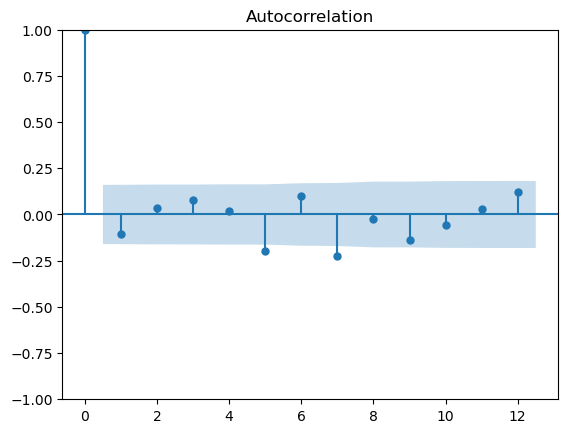

In [37]:
_ = plot_acf(data_quarterly.loc['1926Q3':'1963Q4','Small-High'] - data_quarterly.loc['1926Q3':'1963Q4','Small-Low'], lags=12)

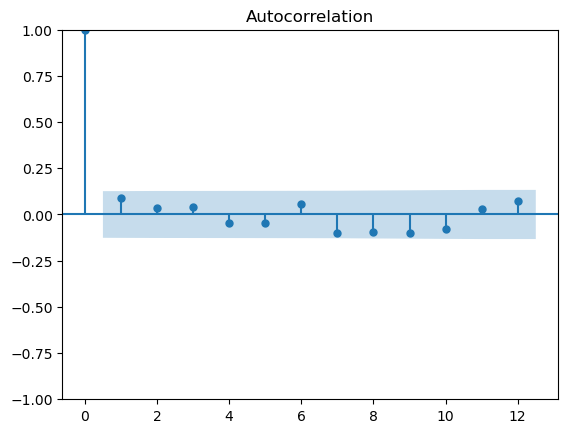

In [38]:
_ = plot_acf(data_quarterly.loc['1964Q1':,'Small-High'] - data_quarterly.loc['1964Q1':,'Small-Low'], lags=12)

We could observe that in the second period of time ACF of quarterly HML excess return shows positive correlation in short terms while negative correlation in long terms. And we could see that for small HML, the excess return shows smaller mean value after 1994/01 with larger volatility potentially because of capital flow and squeezed excess return mentioned in the question. All the evidence shows that the quantitative investment could have some impacts on assets' excess return and its pattern.

#### (c) 

Duration figure doesn't complicate or conflict with the observation of declining value investments. The figure on page 1413 shows cumulative alphas and after 1994, the slope starts to decline which indicates lower alpha within the recent periods. This consists with declining value investments given price is pushed up due to quant investments and other factors.